# Matplotlib

Matplotlib is an outstanding graphics library, designed for scientific computing, with

* high quality 2D and 3D plots
* output in all the usual formats (PDF, PNG, etc.)
* LaTeX integration
* fine grained control over all aspects of presentation
* animation, etc.

There are two styles of Matplotlib - the pythonic way (object-oriented, etc) and an API for matlab folk to migrate easily.

Recommended to use the Pythonic APIs


## The API

### The MATLAB-style API

We've already seen examples of this before, but here's another:

Aside - in some notebooks, we might need to call the following for plots to show. We only need to do it once

In [4]:
%matplotlib inline

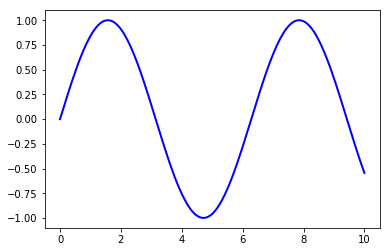

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

This is simple and convenient, but also somewhat limited and un-Pythonic

For example, in the function calls, a lot of objects get created and passed around without making themselves known to the programmer



### The Object Oriented API

Here's the same example, but done in the pythonic object oriented API

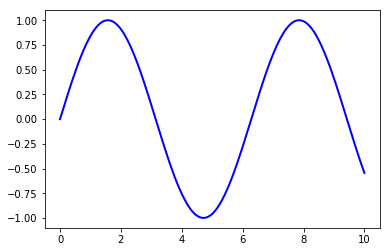

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where

* `fig` is a `Figure` instance—like a blank canvas
* `ax` is an `AxesSubplot` instance—think of a frame for plotting in

The `plot()` function is actually a method of `ax`

While there’s a bit more typing, the more explicit use of objects gives us better control

This will become more clear as we go along

#### Tweaks

Lets change the line colour to red and add a legend

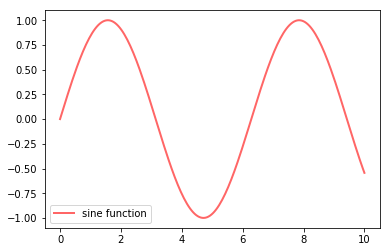

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

`alpha=0.6` makes the line slightly transparent, which has the side effect of also making the line smoother.

Lets more the legend from the bottom left corner to the upper center:

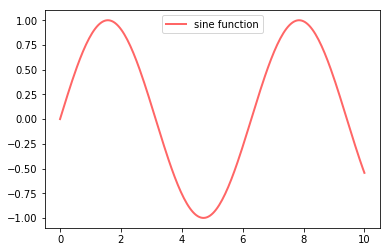

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')    # changed this line to move the legend
plt.show()

Adding LaTeX is trivial, provided everything is setup correctly. Let's change the legen to be a LaTeX equation:

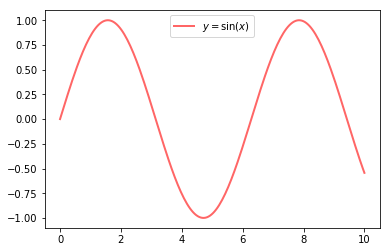

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y = \sin(x)$', alpha=0.6)
ax.legend(loc='upper center')  
plt.show()

Controlling the ticks, adding titles and so on is also straightforward:

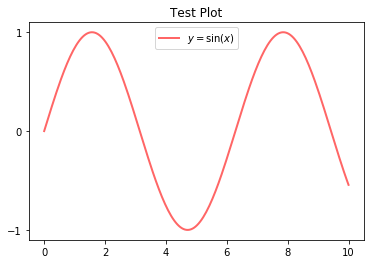

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y = \sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1,0,1])    # set the y-ticks to -1, 0 and 1 only 
ax.set_title('Test Plot')  # Add a title
plt.show()

## More Features

There are many features - here are just some (google for others or play around)

### Multiple plots on one axis

Its easy to add multplie plots on one axis - here's an example

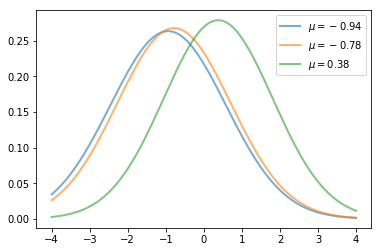

In [16]:
from scipy.stats import norm
from random import uniform
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)  # x axis form -4 to 4, with 150 intervals
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
    
ax.legend()
plt.show()

### Multiple subplots

Sometimes, we want to have multiple plots on the same figure

Here's an example to generate 6 histograms, 3 rows, 2 columns

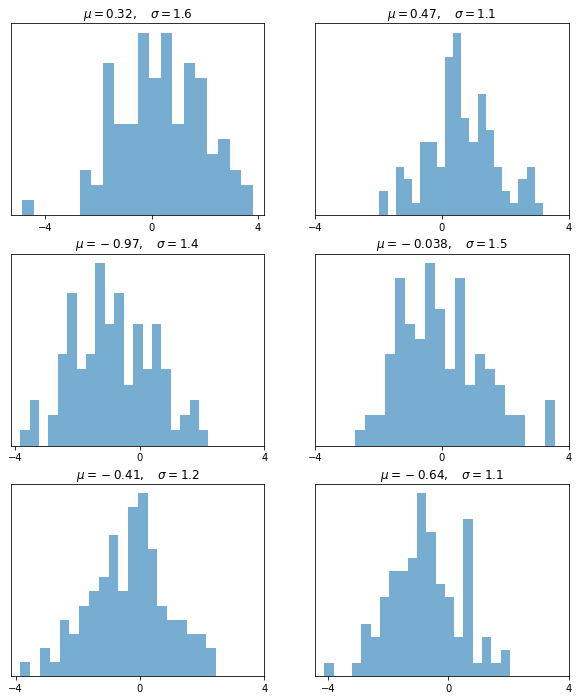

In [24]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1,2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4,0,4], yticks=[])  # Can do this with the set function, 
                                                             # or with the individual set_ functions
plt.show()

### 3D Plots

We can do nice 3D plots. Here's an example

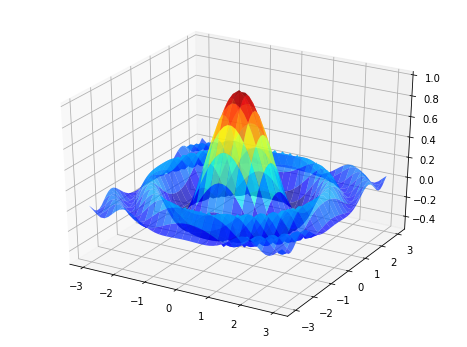

In [25]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import numpy as np

def f(x,y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x,y),
                rstride=2, cstride=2,
                cmap = cm.jet,
                alpha=0.7,
                linewidth=0.25)

ax.set_zlim(-0.5, 1.0)
plt.show()



### A Customizer function

Sometimes we may use the same setup procedure ove and over. For example, if we always want our graph to go through the origin and have a grid, we can use a customized subplot function: 

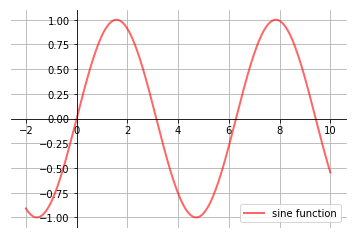

In [26]:
def subplots():
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots()
    
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
        
    ax.grid()
    return fig, ax

fig, ax = subplots()  # use the local version
x = np.linspace(-2, 10, 200)
y = np.sin(x)

ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')

plt.show()

The custom subplots function

* calls the standard `plt.subplots` function internally to generate the `fig, ax` pair,
* makes the desired customizations to `ax`, and
* passes the `fig, ax` pair back to the calling code


## Exercises

### Exercise 1

Plot the function $f(x) = \cos(\pi \theta x)e^{−x}$

over the interval $[0,5]$ for each $\theta$ in `np.linspace(0, 2, 10)`

Place all the curves in the same figure

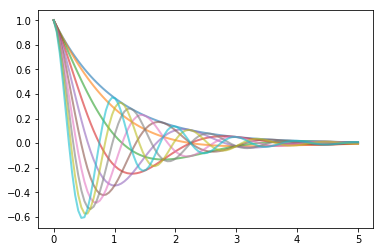

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, th):
    return np.cos(np.pi * th * x) * np.exp(-x)

fig, ax = plt.subplots()

x = np.linspace(0, 5, 100)
theta = np.linspace(0, 2, 10)

for i in theta:
    y = f(x, i)
    ax.plot(x, y, linewidth=2, alpha=0.6)
    
plt.show()


Or we can use greek letter and inline the function as well:

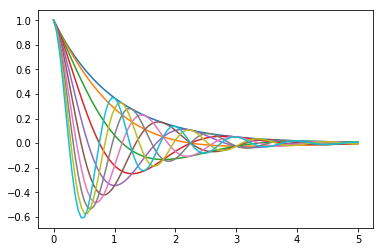

In [31]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = np.linspace(0, 5, 100)
θ_vals = np.linspace(0, 2, 10)

for θ in θ_vals:
    ax.plot(x, np.cos(np.pi * θ * x) * np.exp(-x))
    
plt.show()